<a href="https://colab.research.google.com/github/ArmaanAryan/Bitcoin-Price-Prediction-Using-LSTM/blob/main/Bitcoin_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 w

In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
data = yf.download('BTC-USD', start='2021-01-14', end='2026-01-14', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df=data
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2021-01-14,39187.328125,39187.328125,39966.406250,36868.562500,37325.109375,63615990033
2021-01-15,36825.367188,36825.367188,39577.710938,34659.589844,39156.707031,67760757881
2021-01-16,36178.140625,36178.140625,37864.367188,35633.554688,36821.648438,57706187875
2021-01-17,35791.277344,35791.277344,36722.351562,34069.320312,36163.648438,52359854336
2021-01-18,36630.074219,36630.074219,37299.285156,34883.843750,35792.238281,49511702429


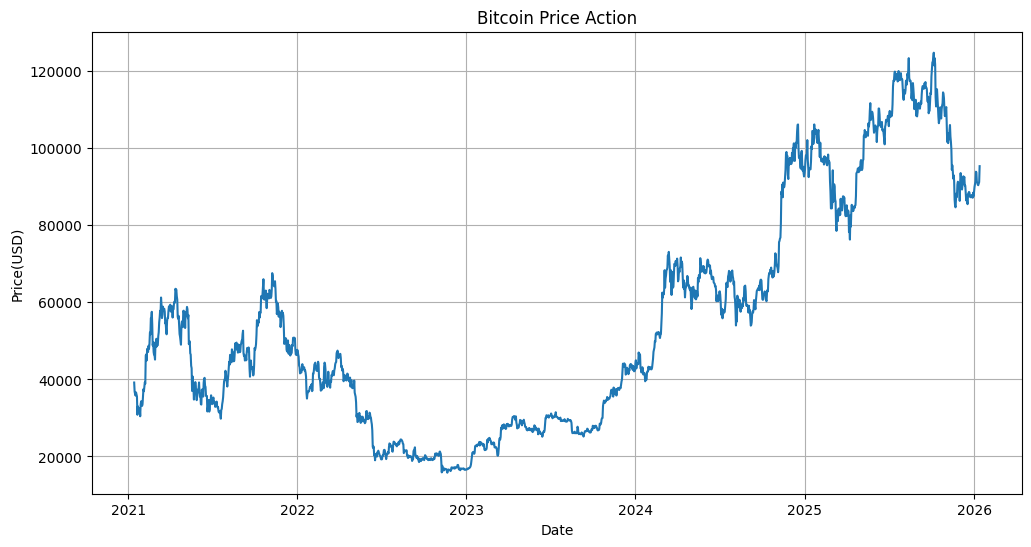

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'])
plt.title("Bitcoin Price Action")
plt.xlabel("Date")
plt.ylabel("Price(USD)")
plt.grid(True)
plt.show()

In [ ]:
MA100 = df.Close.rolling(100).mean()

Text(0.5, 1.0, '100 Day Moving Average')

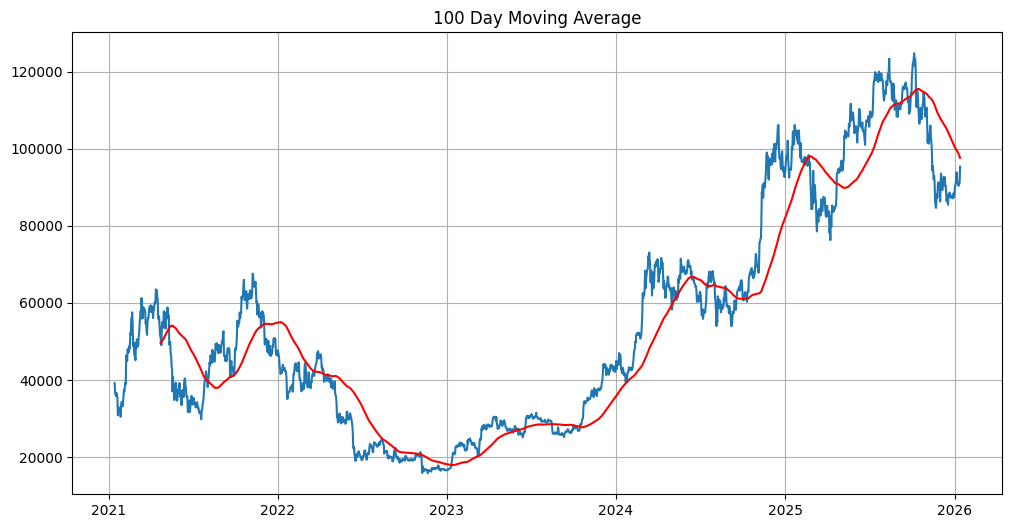

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(MA100, 'r')
plt.grid(True)
plt.title('100 Day Moving Average')

In [ ]:
MA200 = df.Close.rolling(200).mean()

Text(0.5, 1.0, 'Comparision Of 100 & 200 Day Moving Averages')

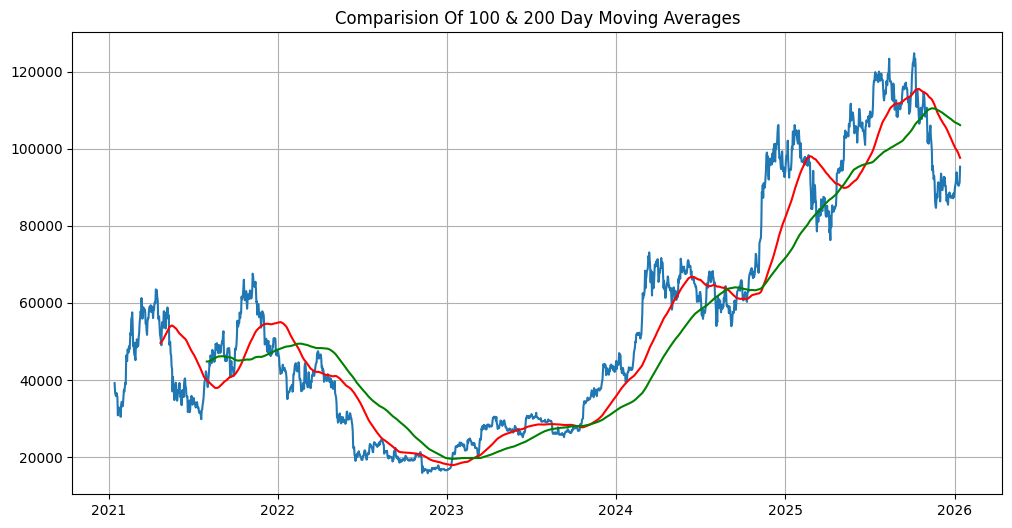

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(MA100, 'r')
plt.plot(MA200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 & 200 Day Moving Averages')

In [13]:
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean().replace(0, 0.001)
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

In [14]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['20d_std'] = df['Close'].rolling(window=20).std()
df['Upper_Band'] = df['MA20'] + (df['20d_std'] * 2)
df['Lower_Band'] = df['MA20'] - (df['20d_std'] * 2)

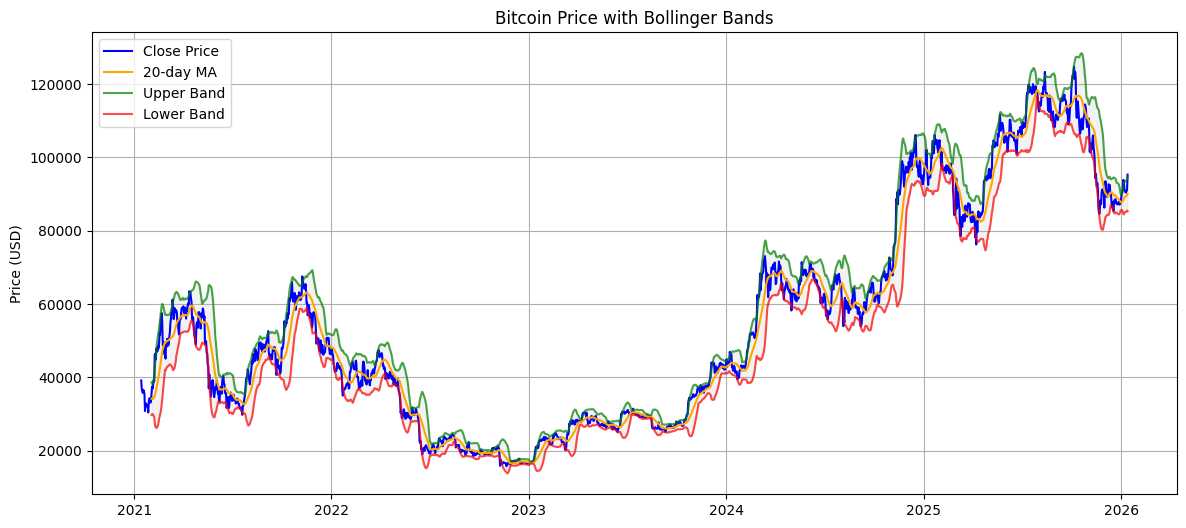

In [16]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['MA20'], label='20-day MA', color='orange')
plt.plot(df.index, df['Upper_Band'], label='Upper Band', color='green', alpha=0.7)
plt.plot(df.index, df['Lower_Band'], label='Lower Band', color='red', alpha=0.7)
plt.fill_between(df.index, df['Upper_Band'], df['Lower_Band'], alpha=0.1, color='gray')
plt.title('Bitcoin Price with Bollinger Bands')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

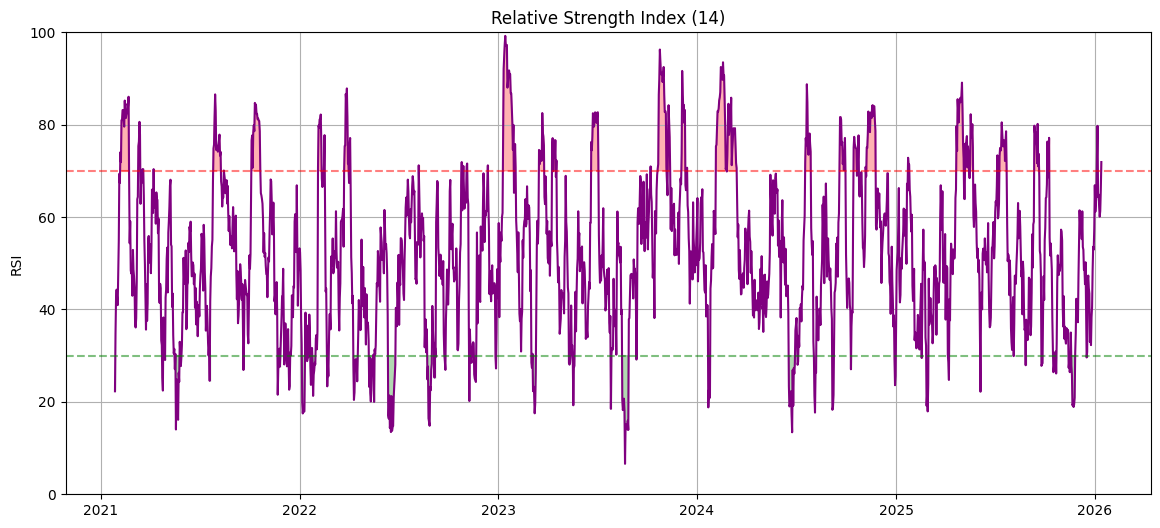

In [18]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['RSI'], color='purple')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.fill_between(df.index, df['RSI'], 70, where=(df['RSI'] >= 70), color='red', alpha=0.3)
plt.fill_between(df.index, df['RSI'], 30, where=(df['RSI'] <= 30), color='green', alpha=0.3)
plt.title('Relative Strength Index (14)')
plt.ylabel('RSI')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

In [19]:
df = df.dropna()

In [20]:
train = pd.DataFrame(data[0:int(len(data)*0.75)])
test = pd.DataFrame(data[int(len(data)*0.75): int(len(data))])

print(train.shape)
print(test.shape)

(1369, 11)
(457, 11)


In [ ]:
train.head()

Price,Date,Close,High,Low,Open,Volume,RSI,MA20,20d_std,Upper_Band,Lower_Band
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,NaN,NaN,NaN,NaN,NaN


In [ ]:
test.head()

Price,Date,Close,High,Low,Open,Volume,RSI,MA20,20d_std,Upper_Band,Lower_Band
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,
2895,2022-08-21,21534.121094,21668.845703,21103.197266,21160.392578,23102307723,37.823587,23202.699902,1024.342539,25251.384980,21154.014824
2896,2022-08-22,21398.908203,21531.462891,20939.183594,21531.462891,31666498758,30.694416,23123.739453,1100.593313,25324.926078,20922.552828
2897,2022-08-23,21528.087891,21646.203125,20955.138672,21401.044922,31878280659,35.715333,23057.818457,1156.153835,25370.126128,20745.510786
2898,2022-08-24,21395.019531,21783.076172,21195.005859,21526.455078,31962253368,24.860766,22996.021582,1211.859264,25419.740110,20572.303054
2899,2022-08-25,21600.904297,21789.636719,21362.441406,21395.458984,31028679593,27.653717,22911.601074,1248.604479,25408.810031,20414.392117


In [ ]:
from sklearn.preprocessing import MinMaxScaler
features = ['Close', 'Open', 'High', 'Low', 'Volume', 'RSI', 'MA20']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


sequence_length = 100
x_train = []
y_train = []

for i in range(sequence_length, len(train_data)):
    x_train.append(train_data[i - sequence_length:i])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)



x_train shape: (2795, 100, 7)
y_train shape: (2795,)


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) # Updated input shape
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='tanh', return_sequences=True))
model.add(Dropout(0.25))

model.add(LSTM(units=80, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120, activation='tanh'))
model.add(Dropout(0.4))

model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        11,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,961 (702.97 KB)

 Trainable params: 179,961 (702.97 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 335ms/step - loss: 0.0036 - mean_absolute_error: 0.0319 - val_loss: 0.0027 - val_mean_absolute_error: 0.0408
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 334ms/step - loss: 4.7909e-04 - mean_absolute_error: 0.0143 - val_loss: 0.0132 - val_mean_absolute_error: 0.0990
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 306ms/step - loss: 3.8461e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0047 - val_mean_absolute_error: 0.0559
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 45s 372ms/step - loss: 3.6068e-04 - mean_absolute_error: 0.0116 - val_loss: 0.0093 - val_mean_absolute_error: 0.0822
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 38s 336ms/step - loss: 3.5180e-04 - mean_absolute_error: 0.0115 - val_loss: 0.0025 - val_mean_absolute_error: 0.0402
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 315ms/step - loss: 3.5809e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0040 - val_mean_absolute_error: 0.0493
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - loss: 3.9938e-04 - 

In [ ]:
model.save('Bitcoin_LSTM.h5')

In [ ]:
test_close = test['Close'].values

In [ ]:
x_test = []
y_test = []

for i in range(sequence_length, len(test_data)):
    x_test.append(test_data[i - sequence_length:i])
    y_test.append(test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
print("x_test shape:", x_test.shape)

x_test shape: (847, 100, 7)


In [ ]:
y_pred = model.predict(x_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step


In [ ]:
y_pred.shape

(847, 1)

In [ ]:
y_test

array([0.15646089, 0.15345719, 0.15786064, 0.15702294, 0.15714379,
       0.15682871, 0.15730812, 0.15725368, 0.15798803, 0.15607585,
       0.15452254, 0.15536967, 0.15499451, 0.15447463, 0.15520678,
       0.15580498, 0.1557237 , 0.15745423, 0.15720413, 0.15829156,
       0.1583209 , 0.15960493, 0.16059967, 0.1629564 , 0.16756725,
       0.17638774, 0.18620188, 0.19626834, 0.19536713, 0.1980928 ,
       0.19801623, 0.1935551 , 0.19731106, 0.21231329, 0.21326709,
       0.21272722, 0.21474685, 0.21193503, 0.21647782, 0.21567491,
       0.21610855, 0.21565899, 0.22267503, 0.21385702, 0.21667999,
       0.22219567, 0.21981855, 0.21960576, 0.21849718, 0.21494723,
       0.2131018 , 0.21785966, 0.21479372, 0.20422111, 0.20263709,
       0.20471028, 0.20393012, 0.2041179 , 0.20801249, 0.22770744,
       0.2212492 , 0.23013986, 0.230854  , 0.22789429, 0.2326269 ,
       0.22892018, 0.22658448, 0.22430689, 0.21723528, 0.21702058,
       0.22066165, 0.22029983, 0.21675615, 0.22146697, 0.21985

In [ ]:
y_pred

array([[0.16893992],
       [0.16620842],
       [0.16337772],
       [0.161266  ],
       [0.16011253],
       [0.1593238 ],
       [0.15869069],
       [0.1581566 ],
       [0.15773669],
       [0.15742144],
       [0.15639725],
       [0.15467477],
       [0.1531512 ],
       [0.1529208 ],
       [0.15339743],
       [0.15417732],
       [0.15564337],
       [0.15638052],
       [0.1570052 ],
       [0.15762144],
       [0.15856887],
       [0.159591  ],
       [0.16081347],
       [0.1623078 ],
       [0.16485892],
       [0.16903889],
       [0.17464902],
       [0.18107541],
       [0.18813923],
       [0.19497646],
       [0.20126909],
       [0.20688578],
       [0.21110901],
       [0.21400124],
       [0.21663716],
       [0.21991396],
       [0.22356527],
       [0.22723106],
       [0.23021573],
       [0.23246917],
       [0.23385683],
       [0.23430869],
       [0.23358166],
       [0.23283342],
       [0.23142597],
       [0.22956234],
       [0.22845191],
       [0.228

In [ ]:
scaler.scale_

array([9.43679663e-06, 9.43659740e-06, 9.18247069e-06, 9.51291729e-06,
       2.84931110e-12, 1.05189924e-02, 9.76705445e-06])

In [ ]:
y_pred_reshaped = np.zeros((len(y_pred), len(features)))
y_pred_reshaped[:, 0] = y_pred.flatten()

y_test_reshaped = np.zeros((len(y_test), len(features)))
y_test_reshaped[:, 0] = y_test

y_pred_actual = scaler.inverse_transform(y_pred_reshaped)[:, 0]
y_test_actual = scaler.inverse_transform(y_test_reshaped)[:, 0]


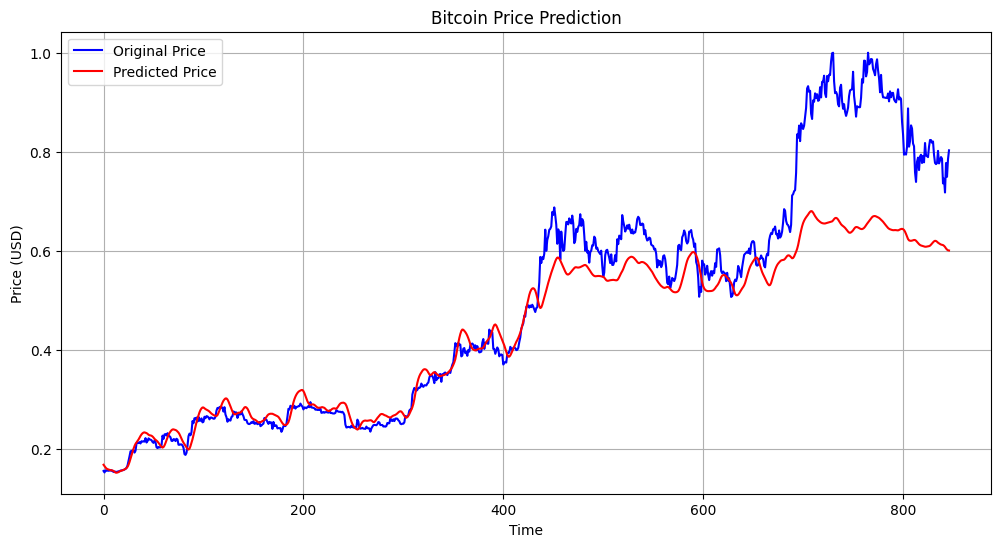

In [ ]:
test_dates = df['Date'].iloc[train_size + sequence_length:].values
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.title("Bitcoin Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 13.63%


In [ ]:
from sklearn.metrics import r2_score
actual = y_test
predicted = y_pred
r2 = r2_score(actual, predicted)
print("R2 score:", r2)


R2 score: 0.7893748515568287


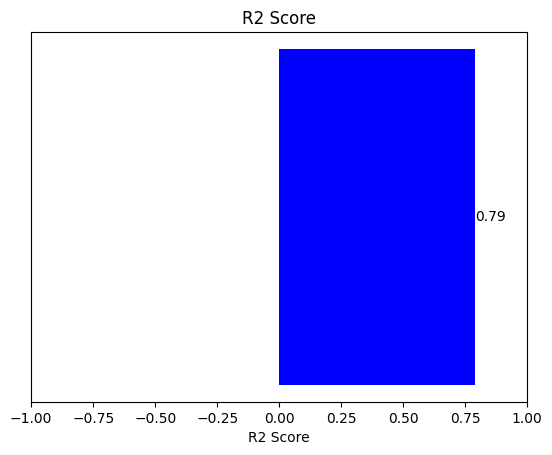

In [ ]:
fig, ax = plt.subplots()
ax.barh(0, r2, color='Blue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()